📊 Cybersecurity Attack Analysis Dashboard.
We developed a comprehensive data visualization dashboard to analyze cybersecurity attack logs. The objective is to monitor patterns, prioritize response, and reduce risks through actionable insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 LOAD AND CLEAN DATA

In [2]:
df = pd.read_csv("/Users/kristina/python/Cyberattacks /cybersecurity_attacks.csv")

Clean column names

In [3]:
df.columns = df.columns.str.strip()

Convert Timestamp to datetime

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

Drop rows with missing critical values

In [5]:
df.dropna(subset=['Timestamp', 'Severity Level', 'Attack Type'], inplace=True)

Clean text columns

In [6]:
df['Severity Level'] = df['Severity Level'].str.strip().str.title()
df['Attack Type'] = df['Attack Type'].str.strip().str.upper()

2. KPI VISUALIZATIONS

KPI 1: Total Attacks Per Month

What it shows: Number of attacks each month  
Why it matters: Tracks attack trends and highlights seasonal or operational risk windows.

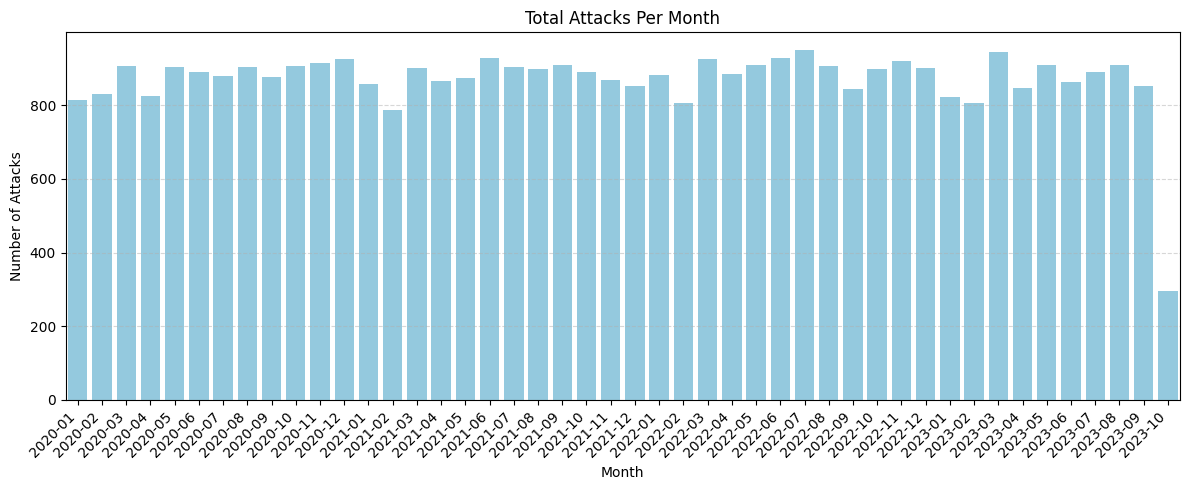

In [7]:
monthly_attacks = df['Timestamp'].dt.to_period('M').value_counts().sort_index()
monthly_attacks_df = monthly_attacks.reset_index()
monthly_attacks_df.columns = ['Month', 'Count']
monthly_attacks_df['Month'] = monthly_attacks_df['Month'].astype(str)

plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_attacks_df, x='Month', y='Count', color='skyblue')
plt.title('Total Attacks Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

KPI 2:Top 10 Attack Types

What it shows: Most common attack types
Why it matters: Prioritizes defense efforts based on recurring threats.

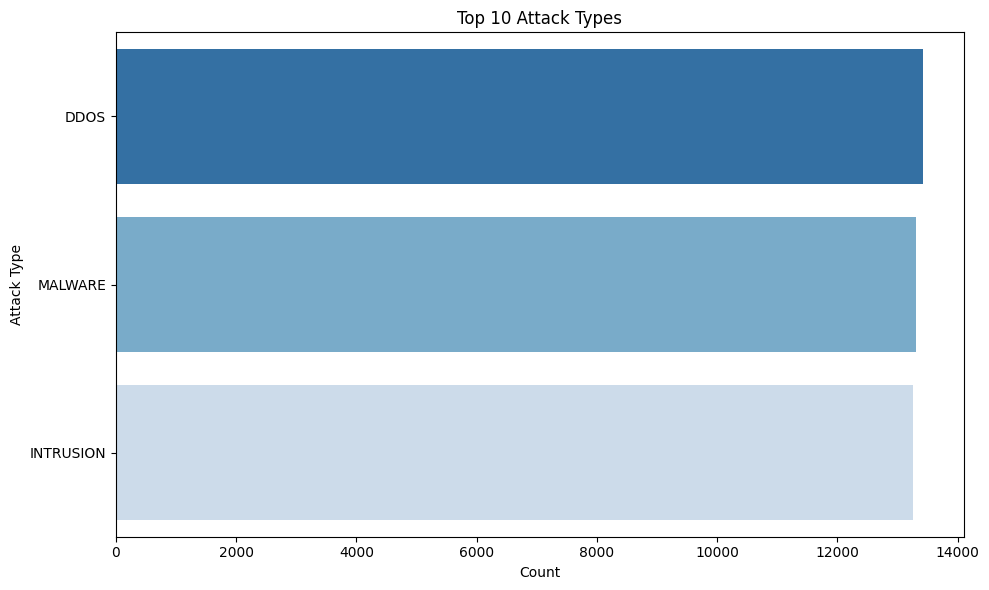

In [8]:
top_attacks = df['Attack Type'].value_counts().head(10).reset_index()
top_attacks.columns = ['Attack Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_attacks, x='Count', y='Attack Type', hue='Attack Type',
            palette="Blues_r", dodge=False, legend=False)
plt.title('Top 10 Attack Types')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

KPI 3: Severity Level Distribution

What it shows: Ratio of High, Medium, and Low severity threats
Why it matters: Understands our current risk posture.

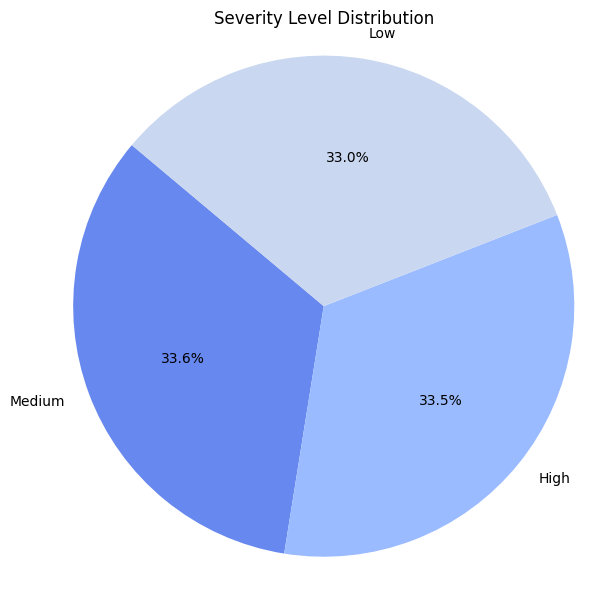

In [9]:
severity_pie = df['Severity Level'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(severity_pie, labels=severity_pie.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Severity Level Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

KPI 4: Top Devices Involved

What it shows: Devices most frequently involved in incidents
Why it matters: Highlights where vulnerabilities lie in the infrastructure.

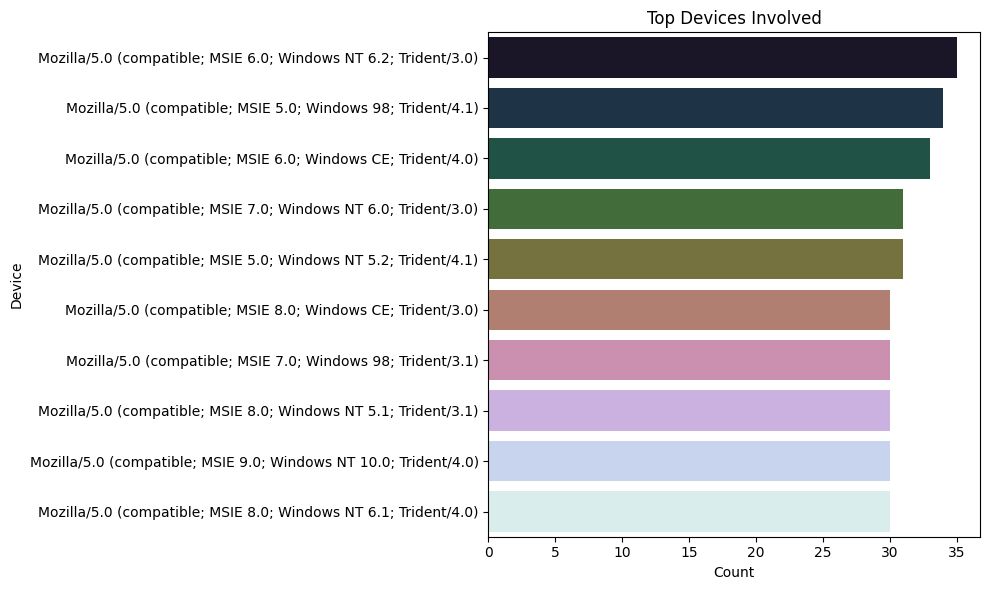

In [10]:
device_info = df['Device Information'].dropna().value_counts().head(10).reset_index()
device_info.columns = ['Device', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=device_info, x='Count', y='Device', hue='Device',
            palette='cubehelix', dodge=False, legend=False)
plt.title('Top Devices Involved')
plt.xlabel('Count')
plt.ylabel('Device')
plt.tight_layout()
plt.show()

KRI 1: Top 10 Source IP Addresses

What it shows: Most frequent attack origins
Why it matters: Helps identify persistent or repeated threats.

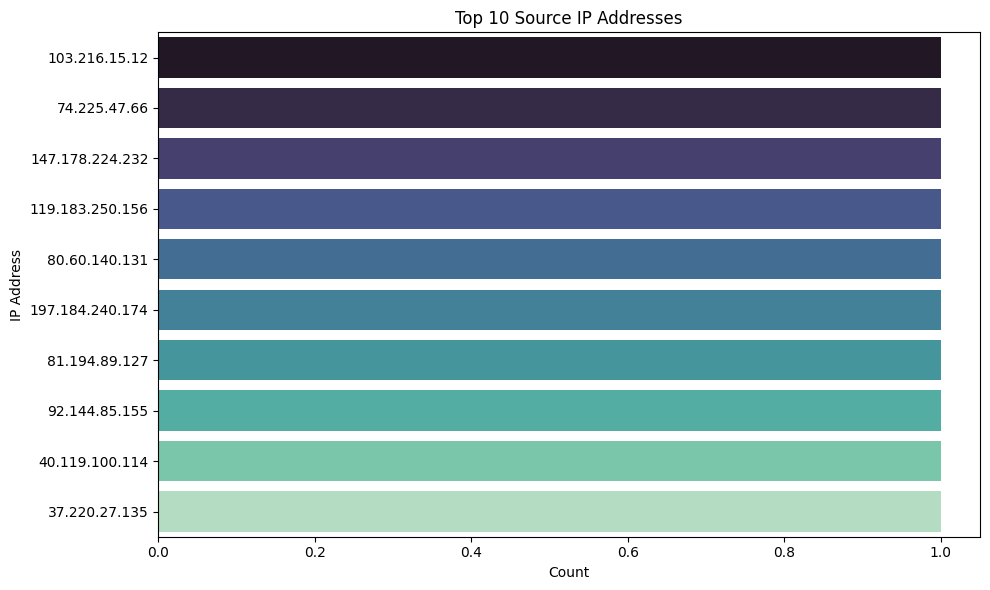

In [11]:
top_ips = df['Source IP Address'].dropna().value_counts().head(10).reset_index()
top_ips.columns = ['IP Address', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_ips, x='Count', y='IP Address', hue='IP Address',
            palette='mako', dodge=False, legend=False)
plt.title('Top 10 Source IP Addresses')
plt.xlabel('Count')
plt.ylabel('IP Address')
plt.tight_layout()
plt.show()

KRI 2: High Severity Over Time

What it shows: Monthly trend of “High” severity incidents
Why it matters: Detects escalation in critical risks.

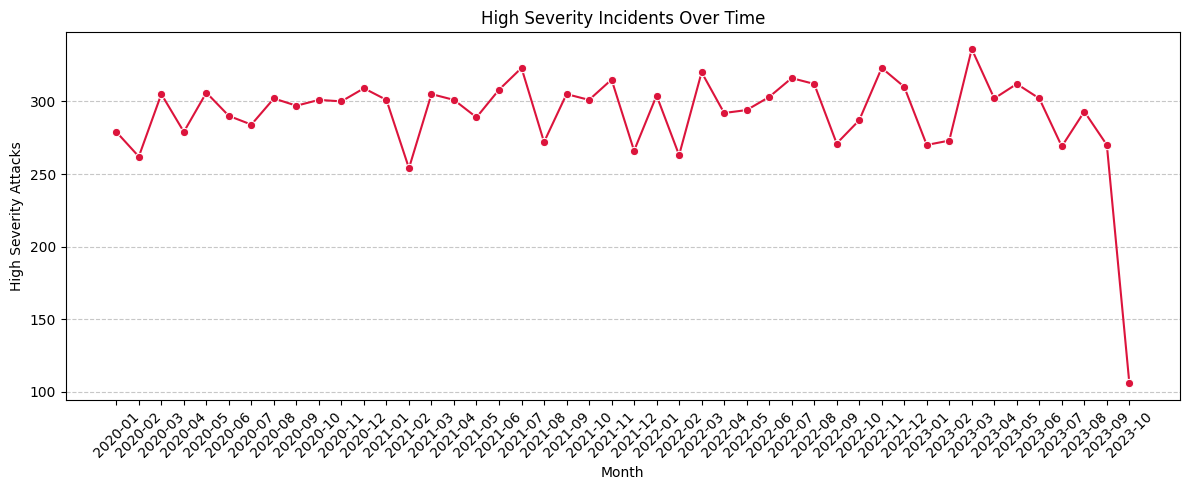

In [12]:
high_sev = df[df['Severity Level'] == 'High']
high_sev_month = high_sev['Timestamp'].dt.to_period('M').value_counts().sort_index()
high_sev_df = high_sev_month.reset_index()
high_sev_df.columns = ['Month', 'Count']
high_sev_df['Month'] = high_sev_df['Month'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=high_sev_df, x='Month', y='Count', marker='o', color='crimson')
plt.title('High Severity Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('High Severity Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KRI 3: Repeated Source IPs (more than 3 times)

What it shows: IPs with frequent activity
Why it matters: Flags persistent threats for investigation.

In [13]:
repeated_ips = df['Source IP Address'].dropna().value_counts()
risky_ips = repeated_ips[repeated_ips > 3]

if risky_ips.empty:
    print("⚠️ No IP addresses found with more than 3 occurrences. Trying >2...")
    risky_ips = repeated_ips[repeated_ips > 2]
if risky_ips.empty:
    print("⚠️ No IP addresses found with more than 2 occurrences. Trying >1...")
    risky_ips = repeated_ips[repeated_ips > 1]
if risky_ips.empty:
    print("❗ No repeated source IPs found above any threshold.")
else:
    risky_ips = risky_ips.sort_values(ascending=False).reset_index()
    risky_ips.columns = ['IP Address', 'Count']

    fig7 = px.bar(risky_ips, x='Count', y='IP Address', orientation='h',
                  title='Repeated Source IPs (Dynamic Threshold)', color='Count')
    fig7.update_layout(yaxis=dict(autorange="reversed"))
    fig7.show()
        


⚠️ No IP addresses found with more than 3 occurrences. Trying >2...
⚠️ No IP addresses found with more than 2 occurrences. Trying >1...
❗ No repeated source IPs found above any threshold.


KRI 4: Time-of-Day Attack Pattern

What it shows: Attack distribution by hour of the day
Why it matters: Helps optimize monitoring and staffing schedules.

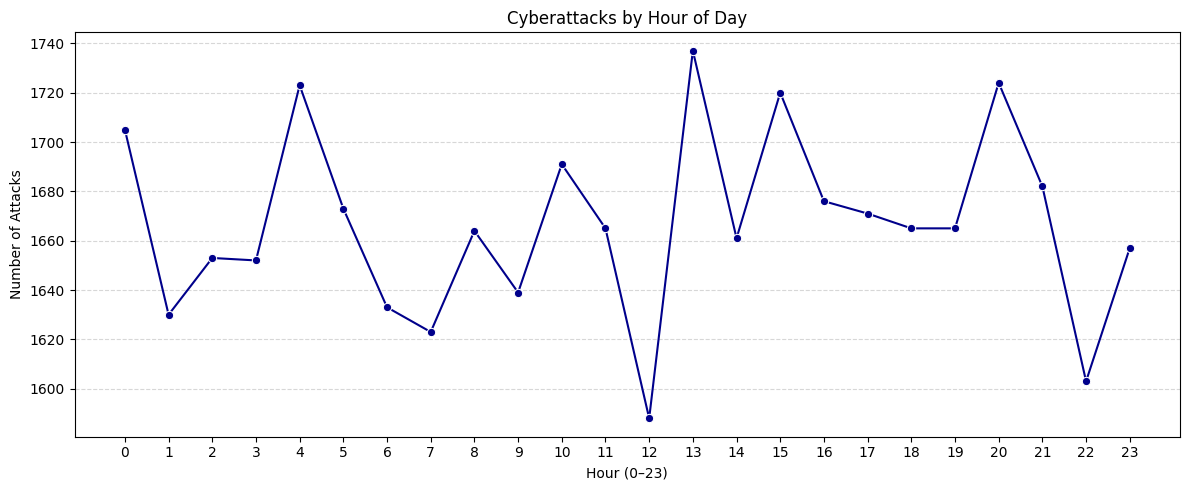

In [14]:
df['Hour'] = df['Timestamp'].dt.hour
hourly = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly.index, y=hourly.values, marker='o', color='darkblue')
plt.title('Cyberattacks by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Number of Attacks')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This dashboard equips us with clear visual insights into our cybersecurity landscape, enabling faster decision-making, improved situational awareness, and targeted risk reduction efforts. It serves as an early-warning system and a trend analysis tool for our security team.